In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv("..\data\gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


In [4]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', "Year": 'Year', 'Value': 'GDP_Per_Capita' })

In [5]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [6]:
gdp_df.shape

(7176, 3)

In [7]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

6. There are 7176 rows and 3 columns
- Country is object column 
- Year is an integer column
- GDP_Per_Capita

In [8]:
gdp_df['Year'].value_counts()

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

7. This dataset represents years 1990 through 2020.
- I noticed there tends to be less values for the earlier years

In [9]:
gdp_df['Country'].nunique()

242

In [10]:
gdp_df['Country'].value_counts(ascending=True).head()

Somalia                       8
Djibouti                      8
Turks and Caicos Islands     10
Sint Maarten (Dutch part)    10
Kosovo                       13
Name: Country, dtype: int64

8. There are 242 countries
- Somalia and Djibouti are the least represented
- These countries may have data security concerns which limits them sharing economic data

In [11]:
gdp_2014 = gdp_df.query('Year == 2014').reset_index()

In [12]:
gdp_2014.describe()

,index,Year,GDP_Per_Capita
count,242.000000,242.0,242.000000
mean,3598.768595,2014.0,19612.875611
std,2074.362752,0.0,20961.714572
min,6.000000,2014.0,822.611195
25%,1793.750000,2014.0,4702.212961
50%,3620.000000,2014.0,12178.874687
75%,5402.750000,2014.0,26461.384188
max,7151.000000,2014.0,155201.740571


(array([149.,  41.,  25.,  19.,   4.,   1.,   1.,   1.,   0.,   1.]),
 array([   822.61119489,  16260.52413249,  31698.43707008,  47136.35000768,
         62574.26294527,  78012.17588287,  93450.08882046, 108888.00175806,
        124325.91469565, 139763.82763325, 155201.74057084]),
 <BarContainer object of 10 artists>)

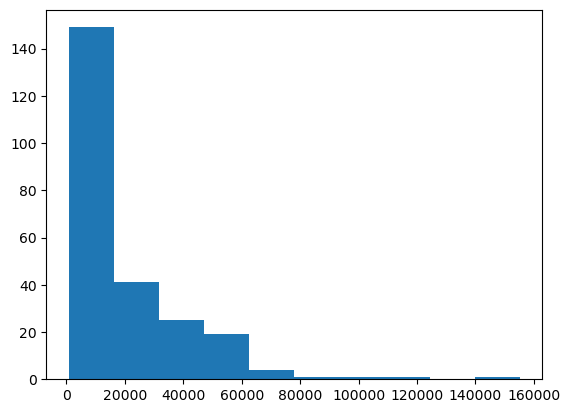

In [13]:
plt.hist(x = gdp_2014['GDP_Per_Capita'])

11. The histogram is right-skewed

In [14]:
gdp_2018 = gdp_df.query('Year == 2018').reset_index().drop(columns = 'index')

In [15]:
gdp_2018.sort_values('GDP_Per_Capita',ascending=False).head()

,Country,Year,GDP_Per_Capita
131,"Macao SAR, China",2018,132373.544079
130,Luxembourg,2018,115049.926079
192,Singapore,2018,98336.956494
180,Qatar,2018,90970.060902
102,Ireland,2018,83726.362961


In [16]:
gdp_2018.sort_values('GDP_Per_Capita',ascending=True).head()

,Country,Year,GDP_Per_Capita
30,Burundi,2018,761.524143
38,Central African Republic,2018,933.109951
51,Dem. Rep. Congo,2018,1085.893688
198,Somalia,2018,1129.531464
159,Niger,2018,1200.402348


12) 
The top 5 countries are:
1. Macao SAR, China
2. Luxembourg
3. Singapore
4. Qatar
5. Ireland

The bottom 5 countries are:
1. Burundi
2. Central African Republic
3. Dem. Rep. Congo
4. Somalia
5. Niger

In [22]:
gdp_1990_2018 = gdp_df.query('Year == 1990 or Year == 2018')
gdp_pivoted = gdp_1990_2018.pivot_table(values = 'GDP_Per_Capita',
                         index = 'Country',
                         columns = ['Year']).reset_index()
gdp_pivoted

Year,Country,1990,2018
0,Afghanistan,NaN,2033.804389
1,Africa Eastern and Southern,3083.976800,3697.317275
2,Africa Western and Central,2810.341129,4132.592996
3,Albania,4827.034551,13317.092313
4,Algeria,8746.340762,11630.679409
...,...,...,...
237,Vietnam,2066.372215,9548.700016
238,West Bank and Gaza,NaN,6318.210068
239,World,9704.621768,16679.316815
240,Zambia,2190.181724,3521.545978


In [23]:
gdp_pivoted = gdp_pivoted.dropna().reset_index
gdp_pivoted

Year,Country,1990,2018
1,Africa Eastern and Southern,3083.976800,3697.317275
2,Africa Western and Central,2810.341129,4132.592996
3,Albania,4827.034551,13317.092313
4,Algeria,8746.340762,11630.679409
5,Angola,5758.950488,6982.129420
...,...,...,...
236,Vanuatu,2855.554643,3093.086718
237,Vietnam,2066.372215,9548.700016
239,World,9704.621768,16679.316815
240,Zambia,2190.181724,3521.545978


In [36]:
gdp_pivoted['Percent_Change'] = (100 * (gdp_pivoted[2018] - gdp_pivoted[1990])/ gdp_pivoted[1990]) 

C:\Users\kidsa\AppData\Local\Temp\ipykernel_424\158301571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = (100 * (gdp_pivoted[2018] - gdp_pivoted[1990])/ gdp_pivoted[1990])


In [40]:
gdp_pivoted

Year,Country,1990,2018,Percent_Change
1,Africa Eastern and Southern,3083.976800,3697.317275,19.887973
2,Africa Western and Central,2810.341129,4132.592996,47.049515
3,Albania,4827.034551,13317.092313,175.885581
4,Algeria,8746.340762,11630.679409,32.977661
5,Angola,5758.950488,6982.129420,21.239615
...,...,...,...,...
236,Vanuatu,2855.554643,3093.086718,8.318247
237,Vietnam,2066.372215,9548.700016,362.099710
239,World,9704.621768,16679.316815,71.869829
240,Zambia,2190.181724,3521.545978,60.787844


In [45]:
gdp_pivoted.query('Percent_Change < 0').count()

Year
Country           17
1990              17
2018              17
Percent_Change    17
dtype: int64

15. 17 Countries experienced a negative percent change

In [48]:
gdp_pivoted.sort_values('Percent_Change', ascending = False).head()

Year,Country,1990,2018,Percent_Change
63,Equatorial Guinea,1039.985049,20386.013868,1860.221820
41,China,1423.896348,15133.995618,962.857956
152,Myanmar,564.227113,4467.858550,691.854635
59,East Asia & Pacific (excluding high income),2186.623227,13727.535687,527.796116
58,East Asia & Pacific (IDA & IBRD),2211.871578,13879.999224,527.522835


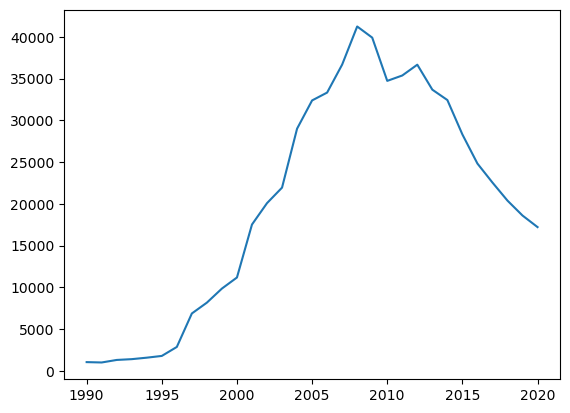

In [59]:
eq_guinea_df = gdp_df.query("Country == 'Equatorial Guinea'").sort_values('Year', ascending = True)
plt.plot(eq_guinea_df['Year'],eq_guinea_df['GDP_Per_Capita'])

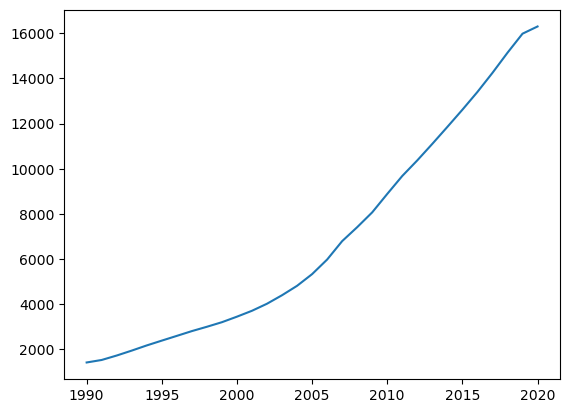

In [60]:
eq_guinea_df = gdp_df.query("Country == 'China'").sort_values('Year', ascending = True)
plt.plot(eq_guinea_df['Year'],eq_guinea_df['GDP_Per_Capita'])